In [1]:
import plot

In [2]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from graph_data import GraphDataset
import energyflow as ef
import torch
import torch.nn as nn
import os.path as osp
from torch_geometric.data import Data, DataLoader, DataListLoader, Batch
from torch.utils.data import random_split
from scipy.stats import iqr

In [3]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'

In [4]:
gdata = GraphDataset(root='/energyflowvol/datasets/', n_jets=100, n_events_merge=1, lhco=True)
_, lhco_data = random_split(gdata, [len(gdata)-100, 100])

In [5]:
gdata = GraphDataset(root='~/.energyflow/datasets', n_jets=100, n_events_merge=1)
_, qg_data = random_split(gdata, [len(gdata)-100, 100])

Processing...
Done!


In [6]:
lhco_x = plot.get_x_input(lhco_data)
lhco_y = plot.get_y_output(lhco_data)

In [7]:
qg_x = plot.get_x_input(qg_data)
qg_y = plot.get_y_output(qg_data)

PT
min: 0.00021260447101667523
max: 0.8064922094345093
avg: 0.024758601561188698
med: 0.005596784874796867
iqr: 0.015315981348976493

ETA
min: -0.39298611879348755
max: 0.39617377519607544
avg: 0.00207726564258337
med: -0.0011138377012684941
iqr: 0.10239058081060648

PHI
min: -0.39344534277915955
max: 0.3890977203845978
avg: -0.011577094905078411
med: -0.0011855969205498695
iqr: 0.12123260647058487

EMD
min: 0.0
max: 13.167162895202637
avg: 4.962190628051758
med: 4.0972137451171875
iqr: 3.611130118370056


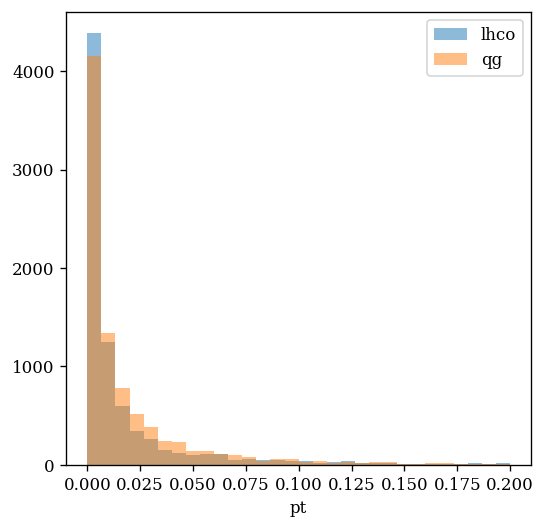

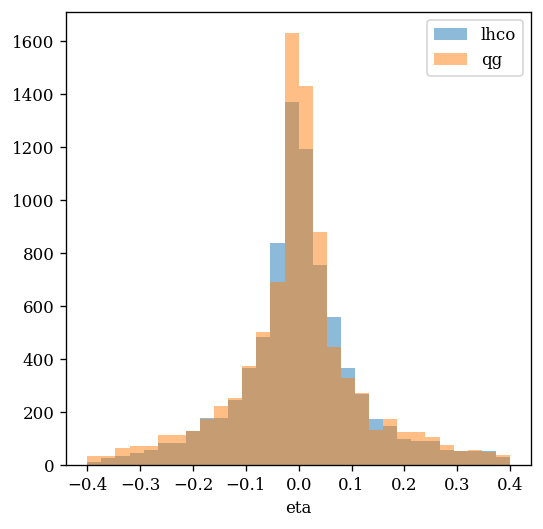

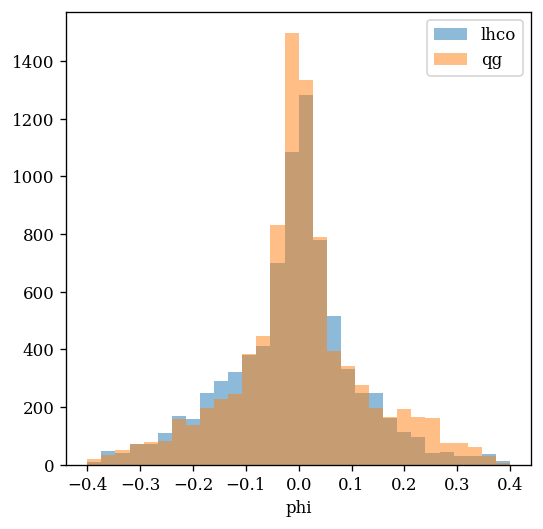

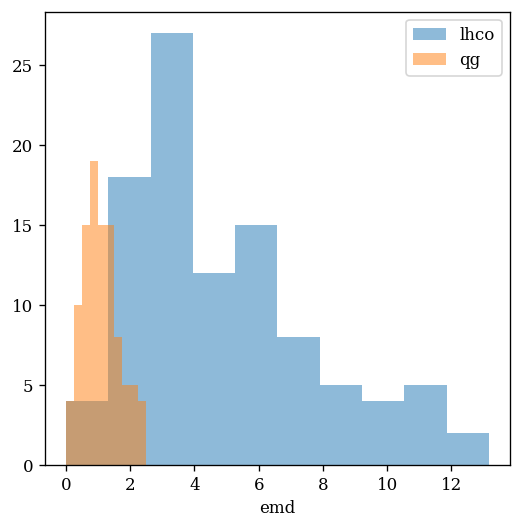

In [12]:
lhco_feat=lhco_x[0][0]
qg_feat=qg_x[0][0]
fig, ax = plt.subplots(figsize =(5, 5))
bins=np.linspace(0,0.2,31)
plt.hist(lhco_feat.numpy(), label='lhco', bins=bins, alpha=0.5)
plt.hist(qg_feat.numpy(), label='qg', bins=bins, alpha=0.5)
plt.legend()
ax.set_xlabel('pt')
print(f'PT\nmin: {min(lhco_feat)}\nmax: {max(lhco_feat)}\navg: {torch.mean(lhco_feat)}\nmed: {torch.median(lhco_feat)}\niqr: {iqr(lhco_feat)}')

lhco_feat=lhco_x[1][0]
qg_feat=qg_x[1][0]
fig, ax = plt.subplots(figsize =(5, 5))
bins=np.linspace(-0.4,0.4,31)
plt.hist(lhco_feat.numpy(), label='lhco', bins=bins, alpha=0.5)
plt.hist(qg_feat.numpy(), label='qg', bins=bins, alpha=0.5)
plt.legend()
ax.set_xlabel('eta')
print(f'\nETA\nmin: {min(lhco_feat)}\nmax: {max(lhco_feat)}\navg: {torch.mean(lhco_feat)}\nmed: {torch.median(lhco_feat)}\niqr: {iqr(lhco_feat)}')

lhco_feat=lhco_x[2][0]
qg_feat=qg_x[2][0]
fig, ax = plt.subplots(figsize =(5, 5))
bins=np.linspace(-0.4,0.4,31)
plt.hist(lhco_feat.numpy(), label='lhco', bins=bins, alpha=0.5)
plt.hist(qg_feat.numpy(), label='qg', bins=bins, alpha=0.5)
plt.legend()
ax.set_xlabel('phi')
print(f'\nPHI\nmin: {min(lhco_feat)}\nmax: {max(lhco_feat)}\navg: {torch.mean(lhco_feat)}\nmed: {torch.median(lhco_feat)}\niqr: {iqr(lhco_feat)}')

lhco_feat=lhco_y
qg_feat=qg_y
fig, ax = plt.subplots(figsize =(5, 5))
plt.hist(lhco_feat.numpy(), label='lhco', alpha=0.5)
plt.hist(qg_feat.numpy(), label='qg', alpha=0.5)
plt.legend()
ax.set_xlabel('emd')
print(f'\nEMD\nmin: {min(lhco_feat)}\nmax: {max(lhco_feat)}\navg: {torch.mean(lhco_feat)}\nmed: {torch.median(lhco_feat)}\niqr: {iqr(lhco_feat)}')